# Movie Recommendation System

### Team Members:
#### 1. Lava kumar Koyi - lavakoyi@iu.edu
#### 2. Sai Durga Aniesh Baratam - sbaratam@iu.edu
#### 3. Nehul Rangappa - nrangapp@iu.edu
#### 4. Nikhil Sai Dandamudi - nidandam@iu.edu

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from datetime import datetime
import copy

## Movies Data Preprocessing

In [2]:
movies_df = pd.read_csv("project_data/movies.csv")

In [3]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


# New Section

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movies_df.shape[0]

9742

In [7]:
movies_df.isnull().sum().sort_values()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
unknown_valued_columns=[]
for c in movies_df.columns:
    print("Number of unknown values for the attribute",c,"=",movies_df.loc[movies_df[c] == '?'].shape[0])
    unknown_valued_columns.append(c)

Number of unknown values for the attribute movieId = 0
Number of unknown values for the attribute title = 0
Number of unknown values for the attribute genres = 0


In [9]:
def split_genre(x):
    return x.split('|')

In [10]:
movies_df['genres'] = movies_df['genres'].apply(split_genre)

In [11]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [12]:
movies_df=movies_df.explode('genres')

In [13]:
movies_df.rename(columns={"genres": "genre"}, inplace=True)

In [14]:

movies_df.head()

,movieId,title,genre
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [15]:
def extract_year_of_release(x):
    year=x.split('(')
    if len(year)!=2:
        return ""
    
    return year[1][:-1]

In [16]:
movies_df['year_of_release'] = movies_df['title'].apply(extract_year_of_release)

In [17]:
movies_df.tail(10)

,movieId,title,genre,year_of_release
9737,193581,Black Butler: Book of the Atlantic (2017),Animation,2017
9737,193581,Black Butler: Book of the Atlantic (2017),Comedy,2017
9737,193581,Black Butler: Book of the Atlantic (2017),Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation,2017
9738,193583,No Game No Life: Zero (2017),Comedy,2017
9738,193583,No Game No Life: Zero (2017),Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


In [18]:
def extract_title(t):
    return t.split(" (")[0]

In [19]:
movies_df['title'] = movies_df['title'].apply(extract_title)

In [20]:
movies_df.tail()

,movieId,title,genre,year_of_release
9738,193583,No Game No Life: Zero,Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018
9740,193587,Bungo Stray Dogs: Dead Apple,Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules,Comedy,1991


## Ratings Data Preprocessing

In [21]:
ratings_df = pd.read_csv("project_data/ratings.csv")

In [22]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [23]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
ratings_df.shape

(100836, 4)

In [25]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [26]:
ratings_df.shape[0]

100836

In [27]:
ratings_df.isnull().sum().sort_values()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [28]:
ratings_df.dropna(inplace=True)

In [29]:
unknown_valued_columns=[]
for c in ratings_df.columns:
    print("Number of unknown values for the attribute",c,"=",ratings_df.loc[ratings_df[c] == '?'].shape[0])
    unknown_valued_columns.append(c)

Number of unknown values for the attribute userId = 0
Number of unknown values for the attribute movieId = 0
Number of unknown values for the attribute rating = 0
Number of unknown values for the attribute timestamp = 0


In [30]:
ratings_df['date']=ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime( "%d-%m-%Y"))

In [31]:
ratings_df.tail()

,userId,movieId,rating,timestamp,date
100831,610,166534,4.0,1493848402,03-05-2017
100832,610,168248,5.0,1493850091,03-05-2017
100833,610,168250,5.0,1494273047,08-05-2017
100834,610,168252,5.0,1493846352,03-05-2017
100835,610,170875,3.0,1493846415,03-05-2017


## Tags Data Preprocessing

In [32]:
tags_df = pd.read_csv("project_data/tags.csv")

In [33]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [34]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [35]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [36]:
tags_df.shape[0]

3683

In [37]:
tags_df.isnull().sum().sort_values()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [38]:
unknown_valued_columns=[]
for c in tags_df.columns:
    print("Number of unknown values for the attribute",c,"=",tags_df.loc[tags_df[c] == '?'].shape[0])
    unknown_valued_columns.append(c)

Number of unknown values for the attribute userId = 0
Number of unknown values for the attribute movieId = 0
Number of unknown values for the attribute tag = 0
Number of unknown values for the attribute timestamp = 0


In [39]:
tags_df['date']=tags_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime( "%d-%m-%Y"))

In [40]:
tags_df.tail()

,userId,movieId,tag,timestamp,date
3678,606,7382,for katie,1171234019,11-02-2007
3679,606,7936,austere,1173392334,08-03-2007
3680,610,3265,gun fu,1493843984,03-05-2017
3681,610,3265,heroic bloodshed,1493843978,03-05-2017
3682,610,168248,Heroic Bloodshed,1493844270,03-05-2017


## Integrated Data Preprocessing

In [41]:
ratings_df1=copy.deepcopy(ratings_df)

ratings_df1.drop(columns=['timestamp'],inplace=True)

ratings_df1.rename(columns={"date": "rated_on"}, inplace=True)

In [42]:
df=movies_df.merge(ratings_df1,how='inner',on='movieId')

In [43]:
df.head()

,movieId,title,genre,year_of_release,userId,rating,rated_on
0,1,Toy Story,Adventure,1995,1,4.0,30-07-2000
1,1,Toy Story,Adventure,1995,5,4.0,08-11-1996
2,1,Toy Story,Adventure,1995,7,4.5,25-01-2005
3,1,Toy Story,Adventure,1995,15,2.5,13-11-2017
4,1,Toy Story,Adventure,1995,17,4.5,18-05-2011


In [44]:
df.shape[0]

274480

In [45]:
df.drop(df.loc[df["year_of_release"]==""].index, inplace=True)

## Movies Data Set EDA

In [46]:
movies_df.head()

,movieId,title,genre,year_of_release
0,1,Toy Story,Adventure,1995
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children,1995
0,1,Toy Story,Comedy,1995
0,1,Toy Story,Fantasy,1995


In [47]:
movies_df["genre"].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [48]:
average_movie_rating=df.groupby('title', as_index=False)['rating'].mean().sort_values('rating',ascending=False)

In [49]:
# Top 15 rated movies
average_movie_rating.head(15)

,title,rating
731,Battle For Sevastopol,5.0
2957,Girls About Town,5.0
3205,Harlan County U.S.A.,5.0
3185,Happy Feet Two,5.0
8220,"Woman Under the Influence, A",5.0
7180,Tenchi Muyô! In Love,5.0
6088,Return to Treasure Island,5.0
3139,Guy X,5.0
7818,Unicorn City,5.0
8230,Won't You Be My Neighbor?,5.0


In [50]:
genre_rating=df.groupby('genre', as_index=False)['rating'].mean().sort_values('rating',ascending=False)

In [51]:
# Top 15 rated genres
genre_rating.head(15)

,genre,rating
10,Film-Noir,3.906100
7,Documentary,3.809228
18,War,3.794569
6,Crime,3.649886
8,Drama,3.638688
12,IMAX,3.621585
3,Animation,3.608479
14,Mystery,3.606354
13,Musical,3.565413
19,Western,3.536100


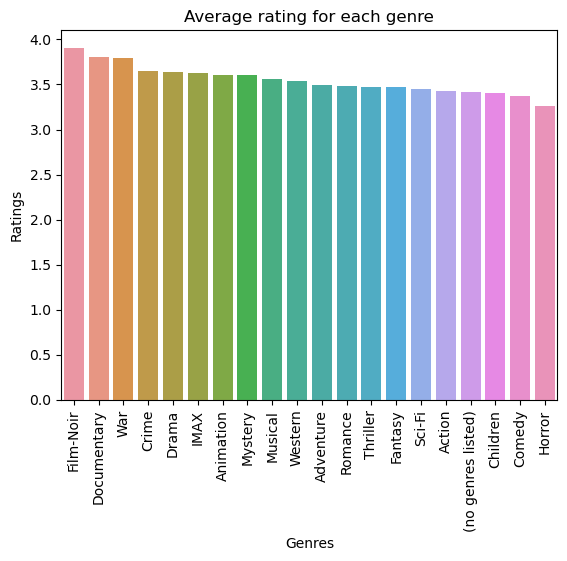

In [52]:
sns.barplot(x=genre_rating["genre"],y=genre_rating["rating"])
plt.title('Average rating for each genre')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Ratings')
plt.show()

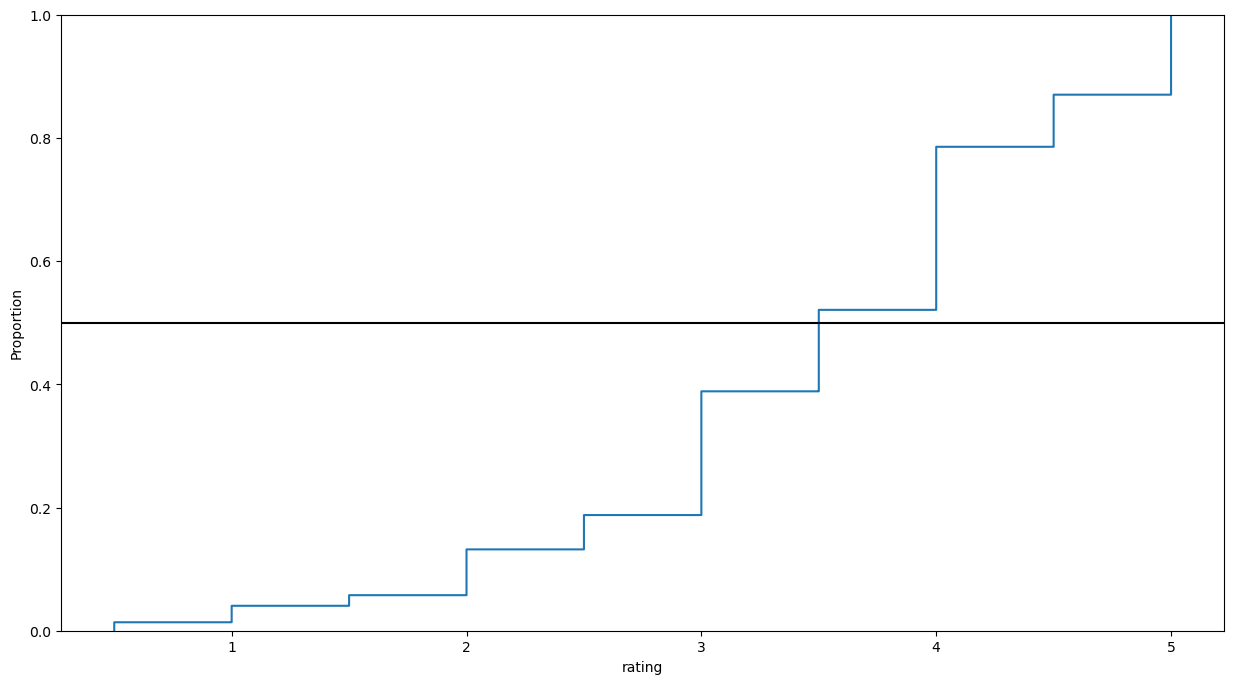

In [53]:
plt.figure(figsize=(15,8))
sns.ecdfplot(x=df['rating'])
plt.axhline(0.5,c="black")

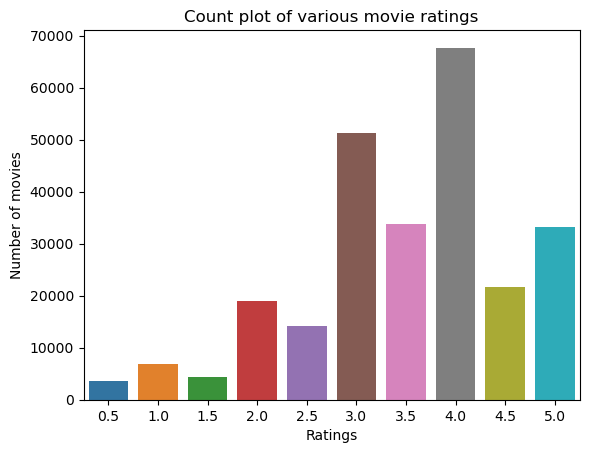

In [54]:
sns.countplot(x=df['rating'])
plt.title('Count plot of various movie ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of movies')
plt.show()

<AxesSubplot:>

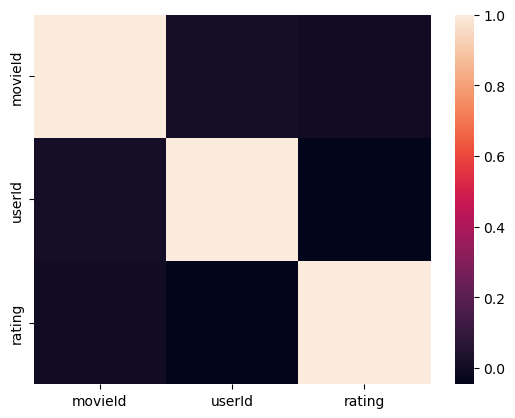

In [55]:
sns.heatmap(df.corr())

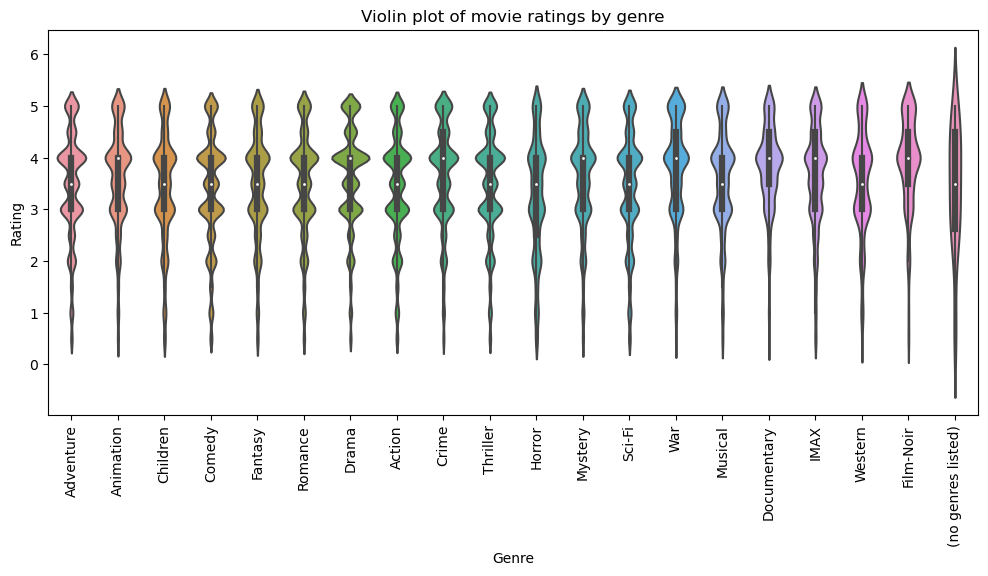

In [56]:
plt.figure(figsize=(12,5))
sns.violinplot(x='genre', y='rating', data=df)
plt.title('Violin plot of movie ratings by genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

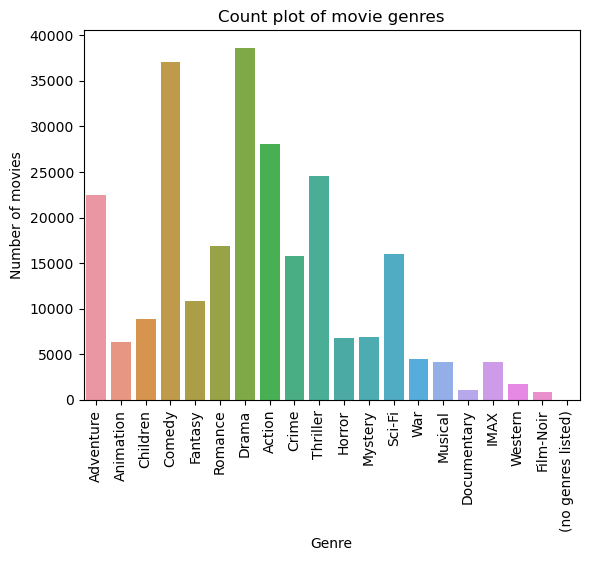

In [57]:
sns.countplot(data=df,x='genre')
plt.title('Count plot of movie genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.show()

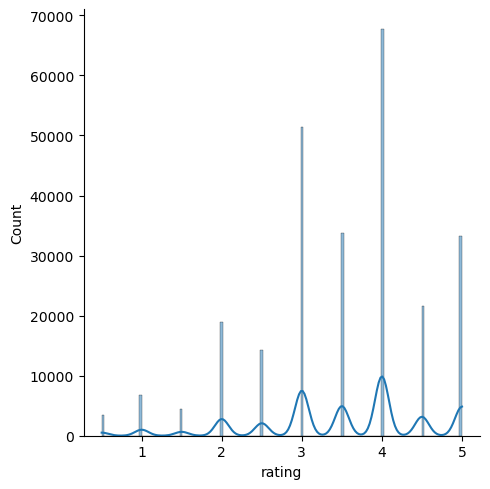

In [58]:
sns.displot(x=df["rating"],kde=True)
plt.show()

In [59]:
df["year_of_release"].value_counts()


1995         14881
1994         13469
1999         11528
1996         11449
2001          9521
             ...  
1919             2
1915             2
1917             1
1920             1
2006–2007        1
Name: year_of_release, Length: 113, dtype: int64

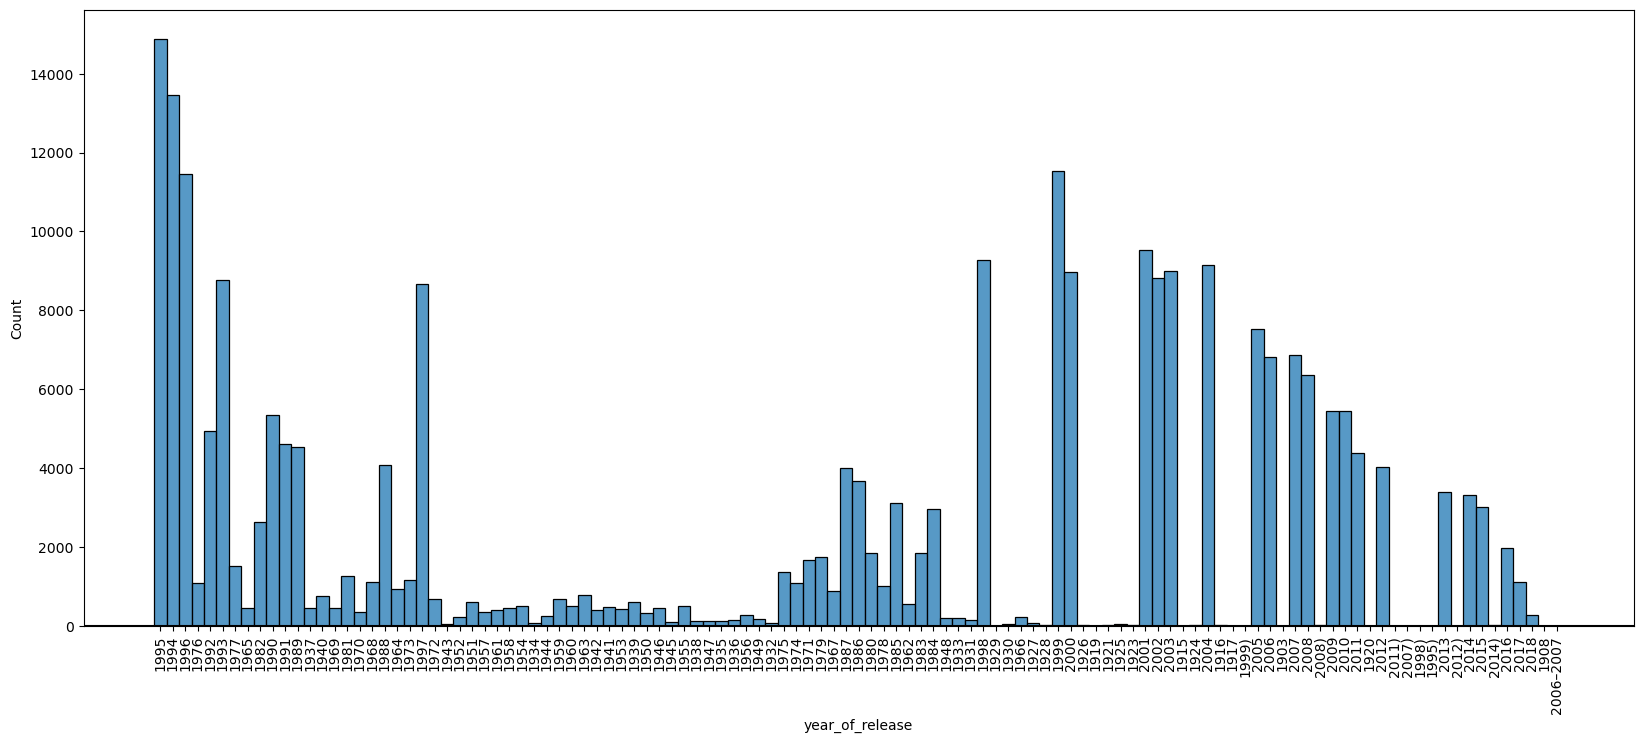

In [60]:
plt.figure(figsize=(20,8))
sns.histplot(x=df["year_of_release"])
plt.xticks(rotation=90)
plt.axhline(0.5,c="black")

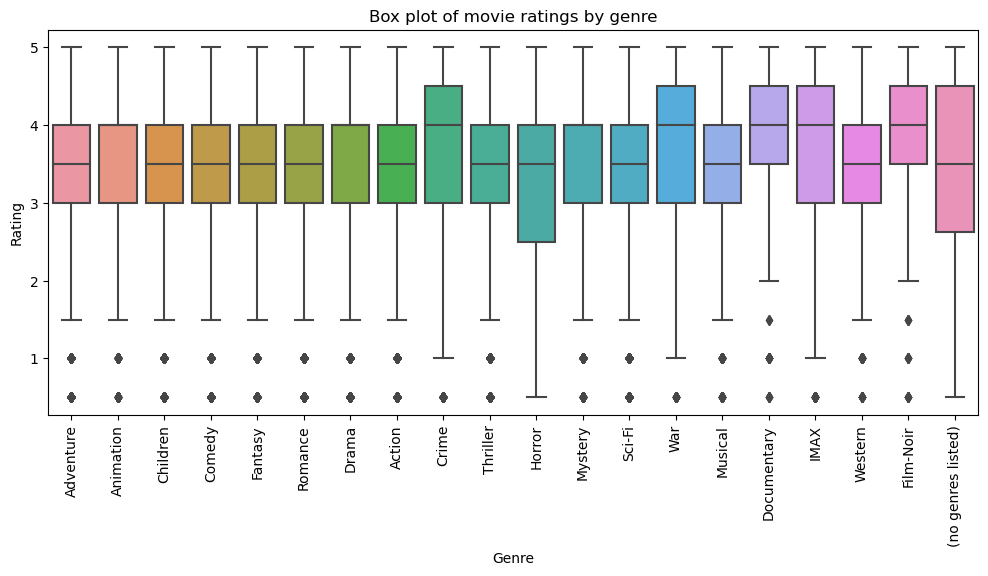

In [61]:
plt.figure(figsize=(12,5))
sns.boxplot(x='genre', y='rating', data=df)
plt.title('Box plot of movie ratings by genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [62]:
more_users=df.groupby('title',as_index=False).size().sort_values('size',ascending=False)

In [63]:
more_users.head()

,title,size
2686,Forrest Gump,1316
5878,Pulp Fiction,1228
7639,Toy Story,1075
4355,"Lion King, The",1032
6559,Shrek,1020


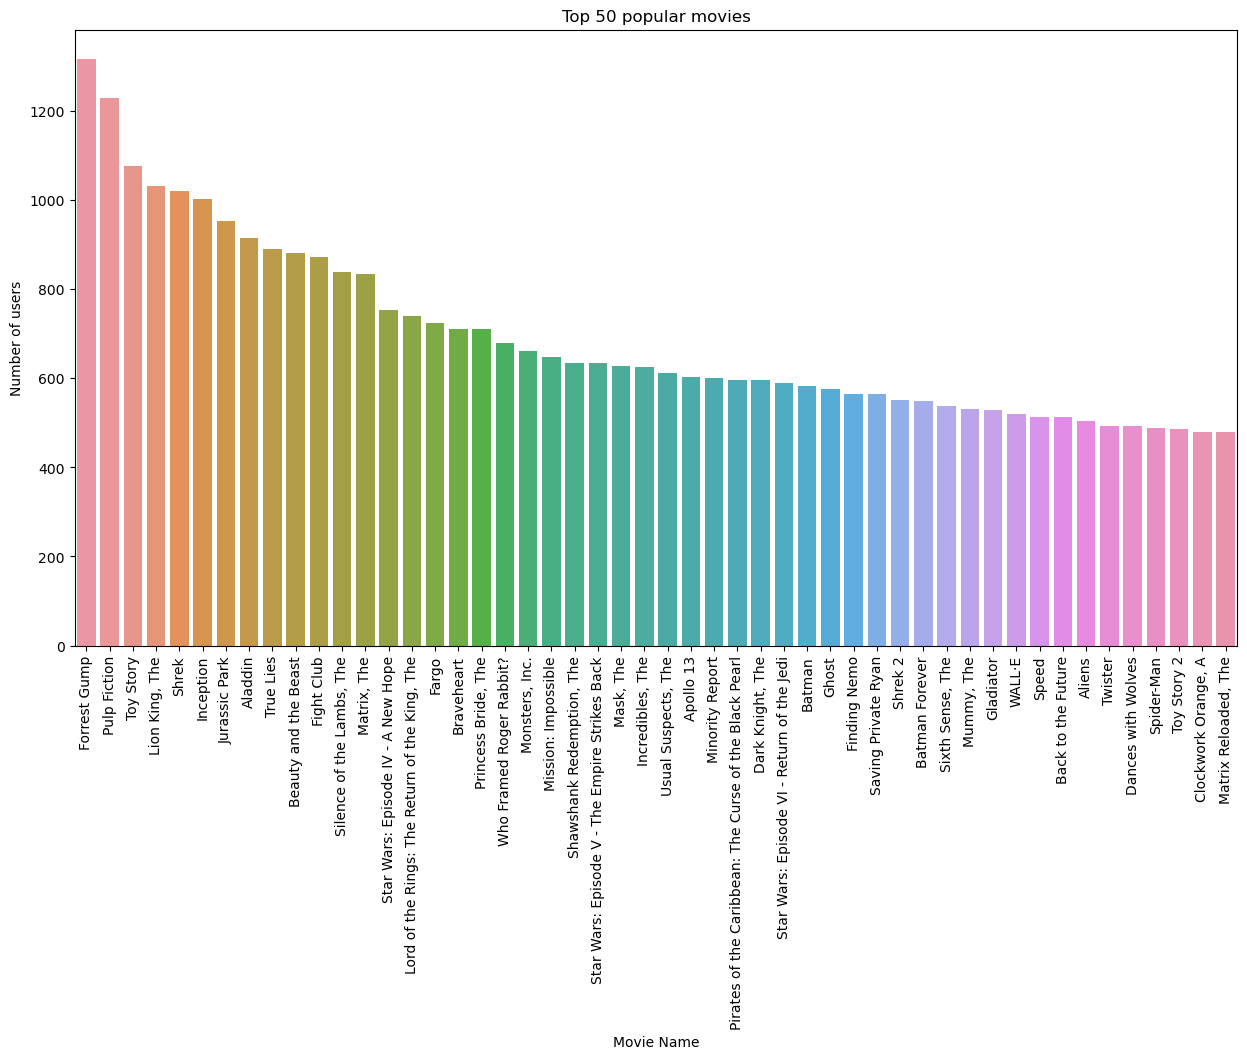

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(data=more_users.head(50),x="title",y='size')

plt.title('Top 50 popular movies')
plt.xlabel('Movie Name')
plt.ylabel('Number of users')
plt.xticks(rotation=90)
plt.show()

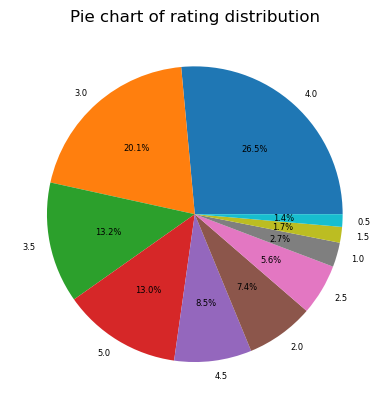

In [65]:
rating_values=df['rating'].value_counts()
plt.title("Pie chart of rating distribution")
plt.pie(rating_values,labels=rating_values.index,autopct='%1.1f%%',textprops={'fontsize': 6})
plt.show()

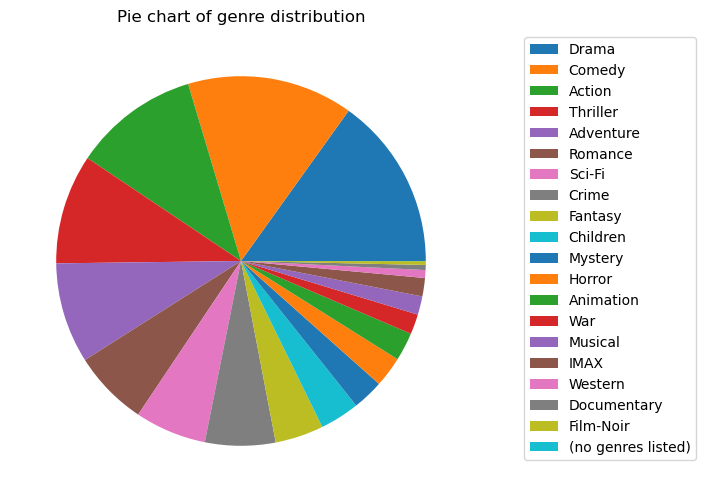

In [66]:

genre_values=df['genre'].value_counts()

plt.figure(figsize=(6,6))
plt.title("Pie chart of genre distribution")
plt.pie(genre_values)
plt.legend(labels=genre_values.index,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [67]:
def convert_to_int(year_str):
        return int(year_str[0:4])

In [68]:
df['year_of_release'] = df['year_of_release'].apply(convert_to_int)

In [69]:
def decade(df):
    min_year = int(df['year_of_release'].min()) % 10
    max_year = int(df['year_of_release'].max()) % 10
    
    min_year = int(df['year_of_release'].min()) - min_year
    max_year = int(df['year_of_release'].max()) + (10 - max_year)
    df['year_of_release'].astype(int)
    for year in range(min_year, max_year+1 , 10):
        df.loc[(df['year_of_release'] >= year) & (df['year_of_release'] <= (year+10)), 'decade_of_release'] = int(year)
    
    return df

In [70]:
df1 = decade(df)

df1['decade_of_release'] = df1['decade_of_release'].astype(int)

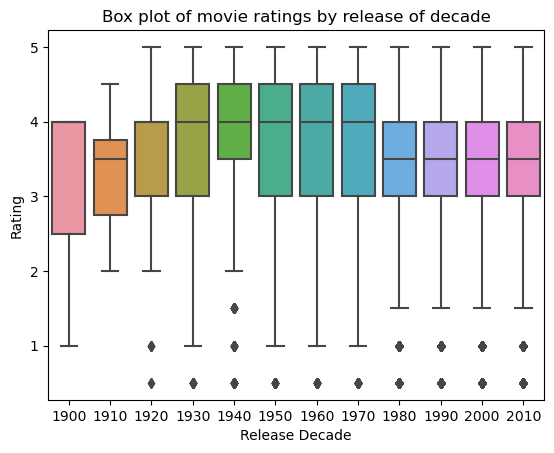

In [71]:
sns.boxplot(x='decade_of_release', y='rating', data=df)
plt.title('Box plot of movie ratings by release of decade')
plt.xlabel('Release Decade')
plt.ylabel('Rating')
plt.show()

Reccommend Similar Movies

In [72]:
ratings_df.head()

,userId,movieId,rating,timestamp,date
0,1,1,4.0,964982703,30-07-2000
1,1,3,4.0,964981247,30-07-2000
2,1,6,4.0,964982224,30-07-2000
3,1,47,5.0,964983815,30-07-2000
4,1,50,5.0,964982931,30-07-2000


In [73]:
new_df=ratings_df.drop(["timestamp"],axis=1)

In [74]:
new_movies=pd.read_csv('project_data/movies.csv')

In [75]:
new_movies.shape

(9742, 3)

In [76]:
len(new_movies["title"].unique())

9737

In [77]:
new_movies['year_of_release'] = new_movies['title'].str.extract(r'\((\d{4})\)$')

In [78]:
new_movies['title'] = new_movies['title'].str.replace(r'\s*\(\d{4}\)', '')

C:\Users\lavakumarkoyi\AppData\Local\Temp\ipykernel_4768\2132368049.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_movies['title'] = new_movies['title'].str.replace(r'\s*\(\d{4}\)', '')


In [79]:
new_movies.shape

(9742, 4)

In [80]:
len(new_movies["title"].unique())

9461

In [81]:
new_df=new_df.merge(new_movies,on="movieId")

In [82]:
new_ratings=pd.DataFrame(new_df.groupby('title')['rating'].mean())
new_ratings["count of ratings"]=pd.DataFrame(new_df.groupby("title")["userId"].count())
new_ratings.head()

,rating,count of ratings
title,,
'71,4.0,1
'Hellboy': The Seeds of Creation,4.0,1
'Round Midnight,3.5,2
'Salem's Lot,5.0,1
'Til There Was You,4.0,2


In [83]:
new_ratings = new_ratings.reset_index(drop=False).rename(columns={'index': 'title'})

In [84]:
new_ratings.to_csv("corr_ratings.csv",index=False)

In [85]:
new_movies.to_csv("corr_movies.csv",index=False)

In [86]:
new_df.head()

,userId,movieId,rating,date,title,genres,year_of_release
0,1,1,4.0,30-07-2000,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,08-11-1996,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,25-01-2005,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,13-11-2017,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,18-05-2011,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


In [87]:
new_df.to_csv("corr_helper_data.csv",index=False)

In [88]:
matrix=new_df.pivot_table(index='userId',values='rating',columns='title')
matrix

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [89]:
matrix.to_csv("corr_matrix.csv",header=True)

In [90]:
def get_similar_by_corr(movie_name):
    sample_movie=matrix[movie_name]
    similar_movies= matrix.corrwith(sample_movie)
    result_df=pd.DataFrame(similar_movies,columns=['Correlation'])
    result_df.dropna(inplace=True)
    result_df= result_df.join(new_ratings['count of ratings'])
    result_df = result_df.reset_index(drop=False).rename(columns={'index': 'title'})
    print(result_df.columns)
    condition = result_df['title'] == movie_name
    result_df.loc[condition, 'count of ratings'] = 150
    return result_df[result_df['count of ratings']>100].sort_values(by='Correlation',ascending=False).head(100)

In [91]:
res_df=get_similar_by_corr('Grumpier Old Men')
res_df

C:\Users\lavakumarkoyi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\lavakumarkoyi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Index(['title', 'Correlation', 'count of ratings'], dtype='object')


,title,Correlation,count of ratings
1126,Grumpier Old Men,1.0,150.0


In [92]:
from sklearn.neighbors import NearestNeighbors
def get_similar_movies(movie_name,res_df):
    res_df= res_df.merge(new_movies,on="title")
    genres_df = res_df['genres'].str.get_dummies('|')

    # Rename columns
    genres_df.columns = [col.lower() for col in genres_df.columns]

    # Concatenate genres_df with original dataframe
    res_df = pd.concat([res_df, genres_df], axis=1)

    # Drop original genres column
    res_df = res_df.drop('genres', axis=1)
    res_df.drop("movieId",axis=1,inplace=True)
    #print(res_df.columns)

    # Building the model
    model_knn= NearestNeighbors(metric= 'cosine',n_neighbors=6, algorithm='brute')
    sample_df=res_df.drop(['count of ratings','year_of_release'],axis=1)
    filtered_df = sample_df[sample_df['title'] == movie_name]
    sample_df=sample_df.drop('title',axis=1)
    
    filtered_df=filtered_df.drop('title',axis=1)

    # Fitting the model

    model_knn.fit(sample_df)
    
    distance,indexes= model_knn.kneighbors(filtered_df)
    print(res_df.iloc[indexes[0]]["title"])

In [94]:
# movie_name='Jumanji'
# res_df=get_similar_by_corr(movie_name)
# print(res_df.head)
# get_similar_movies(movie_name,res_df)


In [ ]:
new_movies.head()

In [95]:
def get_similar_by_corr(matrix,ratings_df, movie_name):

    sample_movie=matrix[movie_name]
    similar_movies= matrix.corrwith(sample_movie)
    result_df=pd.DataFrame(similar_movies,columns=['Correlation'])
    result_df.dropna(inplace=True)
    result_df = result_df.reset_index(drop=False).rename(columns={'index': 'title'})
    #print(result_df.head())
    result_df= result_df.merge(ratings_df,on="title")
    #result_df = result_df.reset_index(drop=False).rename(columns={'index': 'title'})
    #print(result_df.columns)
    condition = result_df['title'] == movie_name
    result_df.loc[condition, 'count of ratings'] = 150
    return result_df[result_df['count of ratings']>100].sort_values(by='Correlation',ascending=False).head(100)

def get_similar_movies(movie_name, movies_df, res_df):
    # print(movies_df.head())
    # print(res_df.head())
    res_df= res_df.merge(movies_df,on="title")
    print(res_df.shape)
    genres_df = res_df['genres'].str.get_dummies('|')

    # Rename columns
    genres_df.columns = [col.lower() for col in genres_df.columns]

    # Concatenate genres_df with original dataframe
    res_df = pd.concat([res_df, genres_df], axis=1)

    # Drop original genres column
    res_df = res_df.drop('genres', axis=1)
    res_df.drop("movieId",axis=1,inplace=True)
    
    # Building the model
    if res_df.shape[0]>10:
        model_knn= NearestNeighbors(metric= 'cosine',n_neighbors=10, algorithm='brute')
    else:
        model_knn= NearestNeighbors(metric= 'cosine',n_neighbors=res_df.shape[0], algorithm='brute')
    #filtered_df = res_df[res_df['title'] == movie_name]
    sample_df=res_df.drop(['count of ratings','year_of_release'],axis=1)
    print(sample_df.head())
    print(sample_df['title'] == movie_name)
    filtered_df = sample_df[sample_df['title'] == movie_name]
    print(filtered_df)
    sample_df=sample_df.drop('title',axis=1)
    filtered_df=filtered_df.drop('title',axis=1)
    # Fitting the model
    model_knn.fit(sample_df)
    # print("sample_df")
    # print(sample_df)
    # print(filtered_df)
    distance,indexes= model_knn.kneighbors(filtered_df)
    
    return res_df, indexes

In [96]:
ratings_df.head()

,userId,movieId,rating,timestamp,date
0,1,1,4.0,964982703,30-07-2000
1,1,3,4.0,964981247,30-07-2000
2,1,6,4.0,964982224,30-07-2000
3,1,47,5.0,964983815,30-07-2000
4,1,50,5.0,964982931,30-07-2000


In [97]:
ratings_df.head()

,userId,movieId,rating,timestamp,date
0,1,1,4.0,964982703,30-07-2000
1,1,3,4.0,964981247,30-07-2000
2,1,6,4.0,964982224,30-07-2000
3,1,47,5.0,964983815,30-07-2000
4,1,50,5.0,964982931,30-07-2000


In [98]:

len(res_df["title"].unique())

1

In [99]:
movies_df = pd.read_csv('corr_movies.csv')
ratings_df = pd.read_csv('corr_ratings.csv')
#corr_matrix = pd.read_csv('corr_matrix.csv')

res_df=get_similar_by_corr(matrix,ratings_df, 'Star Wars: The Last Jedi')
# print(res_df.head())
result,indexes= get_similar_movies('Star Wars: The Last Jedi', movies_df, res_df)
print('Output: {}'.format(result.iloc[indexes[0]]["title"].tolist()))

C:\Users\lavakumarkoyi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\lavakumarkoyi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                                title  Correlation    rating  \
928                              Sleepless in Seattle     1.000000  3.471698   
980                          Star Wars: The Last Jedi     1.000000  3.125000   
216                                            Clerks     1.000000  3.855769   
166                                        Braveheart     0.969345  4.031646   
245  Crouching Tiger, Hidden Dragon (Wo hu cang long)     0.960769  3.836364   

     count of ratings  
928               106  
980               150  
216               104  
166               237  
245               110  
(105, 7)
                                              title  Correlation    rating  \
0                              Sleepless in Seattle     1.000000  3.471698   
1                          Star Wars: The Last Jedi     1.000000  3.125000   
2                                            Clerks     1.000000  3.855769   
3                                        Braveheart   